In [1]:
import os
import scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import yellowbrick
import eli5
%matplotlib inline
%load_ext watermark
%watermark -d -m -v -p numpy,matplotlib,seaborn,yellowbrick,pandas -g
print ('Current working dir : %s' % os.getcwd())

/Users/toddhendricks/miniconda3/envs/metis/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/toddhendricks/miniconda3/envs/metis/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/toddhendricks/miniconda3/envs/metis/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: Th

2020-07-06 

CPython 3.7.7
IPython 7.13.0

numpy 1.17.5
matplotlib 3.2.1
seaborn 0.10.0
yellowbrick 1.1
pandas 1.0.3

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 18.7.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit
Git hash   : 5f0a9827f453b5149be47b8d3599e38cc23c0d5e
Current working dir : /Users/toddhendricks/Public/code/datascience/misc


In [2]:
df = pd.DataFrame(
    np.random.rand(100, 5),
    columns=["a", "b", "c", "d", "e"]
)

In [4]:
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

In [5]:
profile

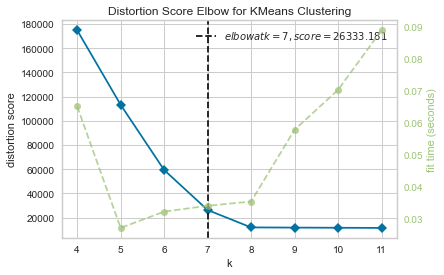

In [6]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [7]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(X, y)
clf.predict(X[:2, :])

clf.predict_proba(X[:2, :])


clf.score(X, y)

/Users/toddhendricks/miniconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9733333333333334

In [8]:
eli5.show_weights(clf)

In [10]:
from eli5.sklearn import PermutationImportance
from sklearn.svm import SVC

# ... load data

svc = SVC().fit(X, y)
perm = PermutationImportance(svc).fit(X, y)
eli5.show_weights(perm)

Weight,Feature
0.5773 ± 0.0850,x2
0.1267 ± 0.0358,x3
0.0120 ± 0.0155,x1
0.0027 ± 0.0107,x0
